# k-Means Clustering

Do $k$-Means Clustering using a different distance metric.



In [6]:
!wget --no-check-certificate https://course.ccs.neu.edu/cs6220/fall2024/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pyplot as plt

all_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")

--2024-10-21 18:06:37--  https://course.ccs.neu.edu/cs6220/fall2024/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K   978KB/s    in 0.3s    

2024-10-21 18:06:37 (978 KB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



## 2. Implement a simple k-means algorithm in Python on Colab with the following initialization:

In [101]:
def kmeans_cluster(data,
                   centroids = np.random.randn(2,5),
                   P = np.eye(2),
                   num_iterations = 100):
  classes = np.random.choice(5, len(data))

  # <YOUR-CODE-HERE>
  centroids = data.T[:, :5]
  centroids = centroids.T
  for i in range(num_iterations):
    for j in range(len(data)):
      min_distance = np.linalg.norm(data[j] - centroids[0])
      nearst_centroid_index = 0
      for idx in range(1, len(centroids)):
          distance = np.linalg.norm(data[j] - centroids[idx])
          if distance < min_distance:
              min_distance = distance
              nearst_centroid_index = idx
      classes[j] = nearst_centroid_index
    new_centroids = np.full_like(centroids, fill_value=0)
    for j in range(centroids.shape[0]):
        points_in_cluster = data[classes == j]
        if len(points_in_cluster) > 0:
            new_centroids[j] = np.mean(points_in_cluster, axis=0)
        else:
            new_centroids[j] = centroids[j]
    if np.array_equal(centroids, new_centroids):
      break
    centroids = new_centroids
  centroids = centroids.T

  return centroids, classes

## 3. Scatter the results in two dimensions with different clusters as different colors.

In [102]:
import matplotlib.pyplot as plt

def plot_data(data, centroids, classes):
  #<YOUR-CODE-HERE>
  for i in range(len(centroids.T)):
      cluster_points = data[classes == i]
      plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
  plt.scatter(centroids[0, :], centroids[1, :], c='black', marker='x')
  plt.show()
  return

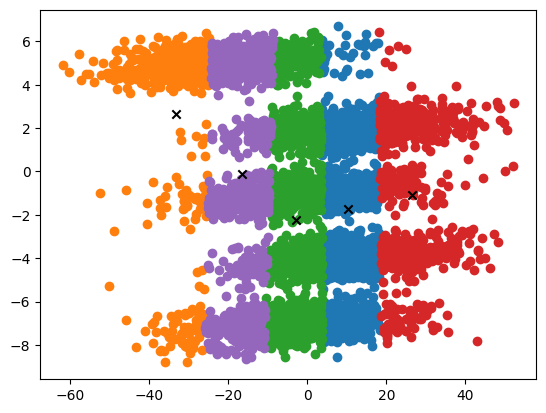

In [103]:
use_P = True #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])

centroids_, classes_ = kmeans_cluster( all_data, centroids_, P = P_ )
plot_data(all_data, centroids_, classes_)

## 5. Implement a specialized k-means with the above Mahalanobis Distance. Scatter the results with the different clusters as different colors. What do you notice? You may want to precompute P−1 so that you aren’t calculating an inverse every single loop of the the k-Means algorithm.

In [104]:
def mahalanobis_distance(x, y, ptp):
    delta = x - y
    return np.sqrt(delta.T @ ptp @ delta)

def kmeans_mahalanobis(data,
                       centroids = np.random.randn(2,5),
                       P = np.eye(2),
                       num_iterations=100):
    centroids = data.T[:, :5]
    centroids = centroids.T
    classes = np.random.choice(5, len(data))
    ptp = np.linalg.inv(P.T @ P)
    for i in range(num_iterations):
      for j in range(len(data)):
        distances = []
        for centroid in centroids:
            distances.append(mahalanobis_distance(data[j], centroid, ptp))
        classes[j] = np.argmin(distances)
      new_centroids = []
      for i in range(len(centroids)):
          points_in_cluster = data[classes == i]
          if len(points_in_cluster) > 0:
              new_centroids.append(np.mean(points_in_cluster, axis=0))
          else:
              new_centroids.append(centroids[i])
      new_centroids = np.array(new_centroids)
      if np.array_equal(centroids, new_centroids):
        break
      centroids = new_centroids
    return centroids, classes

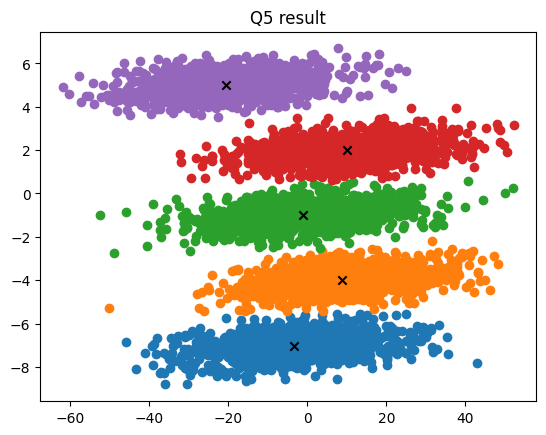

In [105]:
def plot_clusters(data, centroids, classes):
    for i in range(len(centroids)):
      cluster_points = data[classes == i]
      plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
    for i, centroid in enumerate(centroids):
      plt.scatter(centroid[0], centroid[1], c='black', marker='x')
    # plt.scatter(centroids[0, :], centroids[1, :], c='black', marker='x')
    plt.title("Q5 result")
    plt.show()
    return

P = np.array([[10, 0.5], [-10, 0.25]])
use_P = True #@param
initial_centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])

final_centroids, final_classes = kmeans_mahalanobis(all_data, initial_centroids, P)

plot_clusters(all_data, final_centroids, final_classes)

## 6. Calculate and print out the first principle component of the aggregate data.

In [96]:
def get_first_principle_component(data, n_components = 1):
  cov_matrix = np.cov(data, rowvar=False)
  # Eigenvalue decomposition
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
  first_principal_component = eigenvectors[:, np.argmax(eigenvalues)]
  return first_principal_component

first_principle_component = get_first_principle_component(all_data)
print("Q6 Answer: The first principle component of the aggregate data:", first_principle_component)

Q6 Answer: The first principle component of the aggregate data: [[ 0.99838317 -0.05684225]]


## 7. Calculate and print out the first principle components of each cluster. Are they the same as the aggregate data? Are they the same as each other?

In [97]:
first_principal_components_by_cluster = []
unique_clusters = np.unique(final_classes)
print("Q7 Answer")
for cluster in unique_clusters:
    data_in_cluster = all_data[final_classes == cluster]
    principal_component = get_first_principle_component(data_in_cluster)
    first_principal_components_by_cluster.append(principal_component)
    print("The first principle component of cluster", cluster + 1, ":", principal_component)

Q7 Answer
The first principle component of cluster 1 : [[0.99992533 0.01222027]]
The first principle component of cluster 2 : [[0.99989374 0.01457781]]
The first principle component of cluster 3 : [[0.99990986 0.01342629]]
The first principle component of cluster 4 : [[0.99993306 0.01157047]]
The first principle component of cluster 5 : [[0.99993527 0.01137789]]
